## **Clustring** veriyi benzerliklerine göre kümeleme projesi
<h1>Proje Amaçları</h1>

<ol>
  <li>Veri setini incelemek ve 3 ayrı dataframe (Müşteriler, Ürünler, Siparişler) oluşturmak.</li>
  <li>Bu dataframe'leri SQLite veritabanına kaydetmek ve tekrar birleştirmek.</li>
  <li>Müşterileri RFM (Recency, Frequency, Monetary) analizi yöntemiyle segmentlere ayırmak.</li>
  <li>Segment sayısını gerekçelendirmek ve her segmentin özellikleri hakkında bilgi vermek.</li>
  <li>Oluşturulan RFM tablosunu sunmak.</li>
</ol>
---



<img src="https://analyticahouse.com/Website/assets/img/Blogs/6314b7a379496.png" alt="My Image">

In [106]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import sqlite3
import pandas as pd

In [107]:
df=pd.read_csv('/content/PBL5recommendationdata.csv',encoding='latin-1')

<font color="orange">**Exploratory** **Data** **Analysis**</font>

In [108]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,64.29,NaN,6993607863,510142,NaN,1,1426019099,1.438868e+09,1.426101e+09,NaN,Insured By Eye4Fraud,NaN,NaN,NaN,NaN,NaN,NaN,0.0,528

In [109]:

df.drop_duplicates(inplace=True)
#tekrarlanan satırları verimizden kaldırdık

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(10), object(73)
memory usage: 5.8+ MB


In [111]:
df.tail()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
4189,3730,Nora,Fontana,NaN,1463408698,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1463408698,0.0,17421,3730,Nora,Fontana,NaN,17421,NaN,NaN,NaN,USD,NaN,14.85,1.21,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.463409e+09,NaN,paypal,PayPal,16.06,NaN,16706988SV3261147,NaN,NaN,0,1463408854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,20186,17421,1842.0,"Medline Emesis/Barf Bags, throw up bag

In [112]:
df.isnull().sum()

,0
Customers.id,0
Customers.fname,0
Customers.lname,0
Customers.company,3467
Customers.create_date,0
Customers.status,4093
Customers.mailing,2080
Customers.reminders,4194
Customers.tax_exempt,4189
Customers.account_id,4191


In [113]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,64.29,NaN,6993607863,510142,NaN,1,1426019099,1.438868e+09,1.426101e+09,NaN,Insured By Eye4Fraud,NaN,NaN,NaN,NaN,NaN,NaN,0.0,528

In [114]:
df = df.dropna(axis=1, thresh=len(df) - 3000)
#çok fazla boş verisi olan sutunları siliyoruz

In [115]:
len(df.columns)

94

### <font color="green">Veri mühendisliği </font>

In [116]:

Customers=df[['Customers.id','Customers.create_date','Customers.last_modified','Customers.customer_type']]

In [117]:
Customers.isnull().sum()

,0
Customers.id,0
Customers.create_date,0
Customers.last_modified,0
Customers.customer_type,423


In [118]:
Customers['Customers.customer_type'].fillna(Customers['Customers.customer_type'].mode()[0],inplace=True)

In [119]:
Orders=df[['Orders.subtotal','Orders.total','Orders.payment_status','Orders.payment_amount','Orders.status','Orders.payment_date']]

In [120]:
Orders.isnull().sum()


,0
Orders.subtotal,0
Orders.total,0
Orders.payment_status,5
Orders.payment_amount,18
Orders.status,0
Orders.payment_date,18


In [121]:
Orders['Orders.payment_status'].fillna(Orders['Orders.payment_status'].mode()[0],inplace=True)

In [122]:
Orders['Orders.payment_amount'].fillna(Orders['Orders.payment_amount'].mode()[0],inplace=True)

In [123]:
Orders['Orders.payment_date'].fillna(Orders['Orders.payment_date'].mode()[0],inplace=True)

In [124]:
Product=df[['Products.id','Products.status','Products.list_price','Products.price','Products.cost','Products.last_modified']]

In [125]:
Product.isnull().sum()

,0
Products.id,157
Products.status,157
Products.list_price,177
Products.price,158
Products.cost,157
Products.last_modified,157


In [126]:

Product['Products.id'].fillna(Product['Products.id'].mode()[0],inplace=True)

In [127]:
Product['Products.status'].fillna(Product['Products.status'].mode()[0],inplace=True)

In [128]:
Product['Products.list_price'].fillna(Product['Products.list_price'].mode()[0],inplace=True)

In [129]:
Product['Products.cost'].fillna(Product['Products.cost'].mode()[0],inplace=True)

In [130]:
Product['Products.price'].fillna(Product['Products.price'].mode()[0],inplace=True)

In [131]:
Product['Products.cost'].fillna(Product['Products.cost'].mode()[0],inplace=True)

In [132]:
Product['Products.last_modified'].fillna(Product['Products.last_modified'].mode()[0],inplace=True)

In [133]:
Product.isnull().sum()

,0
Products.id,0
Products.status,0
Products.list_price,0
Products.price,0
Products.cost,0
Products.last_modified,0


### <font color="red">Veriyi sql veri tabanına yazma </font>


In [134]:

# SQLite veritabanı bağlantısı oluşturma
conn = sqlite3.connect('customers')

# DataFrame'i veritabanına kaydetme
Customers.to_sql('customers', conn, if_exists='replace', index=False)

# Bağlantıyı kapatma

conn.close()

In [135]:
conn = sqlite3.connect('orders')
Orders.to_sql('orders', conn, if_exists='replace', index=False)
conn.close()

In [136]:
conn = sqlite3.connect('product')
Product.to_sql('product', conn, if_exists='replace', index=False)
conn.close()

In [137]:
# SQLite veritabanı bağlantısı oluşturma
conn = sqlite3.connect('customers')
# Veritabanından DataFrame okuma
c = pd.read_sql_query("SELECT * FROM customers", conn)
# Bağlantıyı kapatma
conn.close()


In [138]:
conn = sqlite3.connect('product')
p= pd.read_sql_query("SELECT * FROM product", conn)
conn.close()


In [139]:
conn = sqlite3.connect('orders')
o = pd.read_sql_query("SELECT * FROM orders", conn)
conn.close()


In [140]:
x=pd.concat([c,o,p],axis=1)
#üç veri tabanını da birleştiriyoruz

In [141]:
x.isnull().sum()

,0
Customers.id,0
Customers.create_date,0
Customers.last_modified,0
Customers.customer_type,0
Orders.subtotal,0
Orders.total,0
Orders.payment_status,0
Orders.payment_amount,0
Orders.status,0
Orders.payment_date,0


## **Clustring**

In [142]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [143]:
x.head()

,Customers.id,Customers.create_date,Customers.last_modified,Customers.customer_type,Orders.subtotal,Orders.total,Orders.payment_status,Orders.payment_amount,Orders.status,Orders.payment_date,Products.id,Products.status,Products.list_price,Products.price,Products.cost,Products.last_modified
0,797,1426018724,1437764306,0.0,57.20,64.29,3.0,64.29,1,1.426019e+09,2310.0,0.0,80.70,57.64,44.00,1.463163e+09
1,3,1386089139,1437764354,0.0,20.00,29.99,3.0,29.99,1,1.386090e+09,177.0,1.0,14.41,10.29,1.87,1.462370e+09
2,3,1386089139,1437764354,0.0,68.78,78.73,3.0,78.73,3,1.449604e+09,1.0,0.0,96.29,68.78,52.50,1.463163e+09
3,4,1386780263,1437762646,0.0,19.56,29.55,3.0,29.55,1,1.386780e+09,983.0,0.0,27.38,19.56,12.62,1.462595e+09
4,5,1386861599,1437764316,0.0,36.05,46.00,3.0,46.00,1,1.386862e+09,991.0,1.0,50.47,36.05,25.75,1.462370e+09


In [144]:
model=KMeans(4)

In [145]:
model=model.fit(x)

In [146]:
tahmin=model.predict(x)

In [147]:
tahmin

array([1, 3, 1, ..., 2, 2, 2], dtype=int32)

In [148]:
x['cluster']=tahmin
#yeni bir cluster sutunu açıp tahmindeki verileri oraya atıyoryz

In [149]:
x.head()

,Customers.id,Customers.create_date,Customers.last_modified,Customers.customer_type,Orders.subtotal,Orders.total,Orders.payment_status,Orders.payment_amount,Orders.status,Orders.payment_date,Products.id,Products.status,Products.list_price,Products.price,Products.cost,Products.last_modified,cluster
0,797,1426018724,1437764306,0.0,57.20,64.29,3.0,64.29,1,1.426019e+09,2310.0,0.0,80.70,57.64,44.00,1.463163e+09,1
1,3,1386089139,1437764354,0.0,20.00,29.99,3.0,29.99,1,1.386090e+09,177.0,1.0,14.41,10.29,1.87,1.462370e+09,3
2,3,1386089139,1437764354,0.0,68.78,78.73,3.0,78.73,3,1.449604e+09,1.0,0.0,96.29,68.78,52.50,1.463163e+09,1
3,4,1386780263,1437762646,0.0,19.56,29.55,3.0,29.55,1,1.386780e+09,983.0,0.0,27.38,19.56,12.62,1.462595e+09,3
4,5,1386861599,1437764316,0.0,36.05,46.00,3.0,46.00,1,1.386862e+09,991.0,1.0,50.47,36.05,25.75,1.462370e+09,3


In [150]:
silhouette_score(x,tahmin)

0.5171740737832388

In [151]:
import matplotlib.pyplot as plt

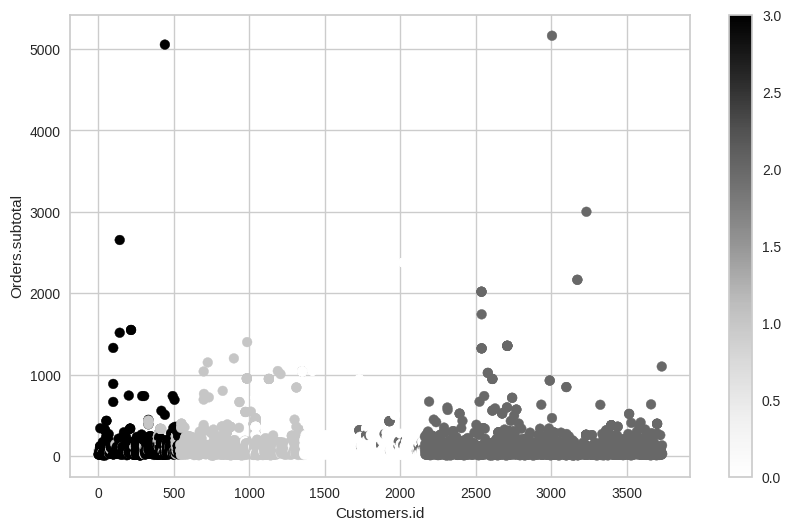

In [152]:
plt.figure(figsize=(10,6))
plt.scatter(x['Customers.id'],x['Orders.subtotal'],c=tahmin)
plt.colorbar()
plt.xlabel('Customers.id')
plt.ylabel('Orders.subtotal');

In [153]:
import plotly.express as px

fig = px.scatter(
    x,
    x='Customers.id',
    y='Orders.subtotal',
    color=tahmin,
    labels={'Customers.id': 'Customers.id', 'Orders.subtotal': 'Orders.subtotal'},
    title='Müşteri ID ve Sipariş Toplamı Dağılımı'
)
fig.show()


In [154]:

wcss=[]
ss=[]
for i in range(2,10):
  model=KMeans(i)
  model.fit(x)
  tahmin=model.predict(x)
  ss1=silhouette_score(x,tahmin)
  ss.append(ss1)
  print(ss1)
  wcss.append(model.inertia_)

0.657278854996346
0.6164767627682542
0.5171740737832388
0.512649221004368
0.5258862933443884
0.5143357627097926
0.5061557219984919
0.5114995041967259


In [155]:
import seaborn as sns

<Axes: >

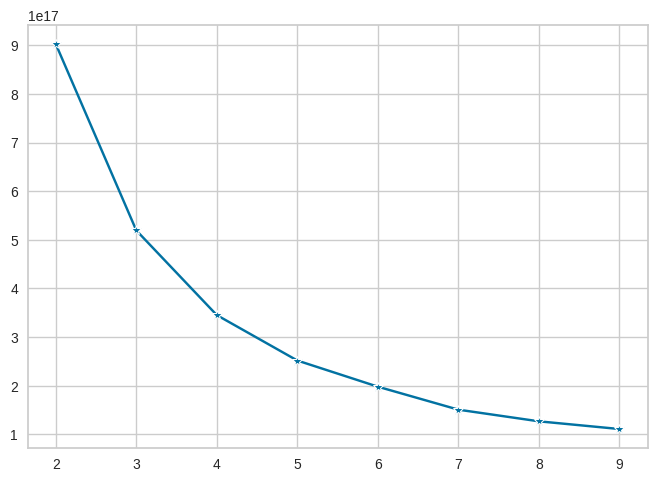

In [156]:
sns.lineplot(x=range(2,10),y=wcss,marker='*')

In [157]:
pip install --upgrade pip

In [158]:
from  yellowbrick.cluster import KElbowVisualizer

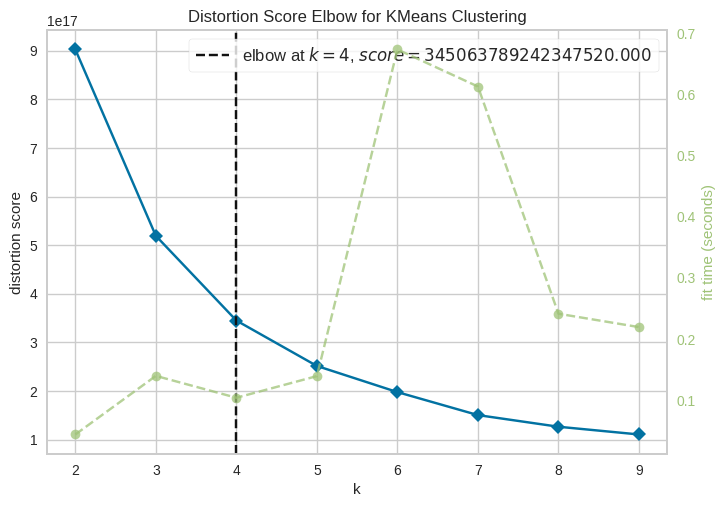

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [159]:
km=KMeans()
vis=KElbowVisualizer(km,k=(2,10))
vis.fit(x)
vis.show()

In [160]:
#Hierchical Clustring

In [161]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [162]:
data=linkage(x,method='ward',metric='euclidean')

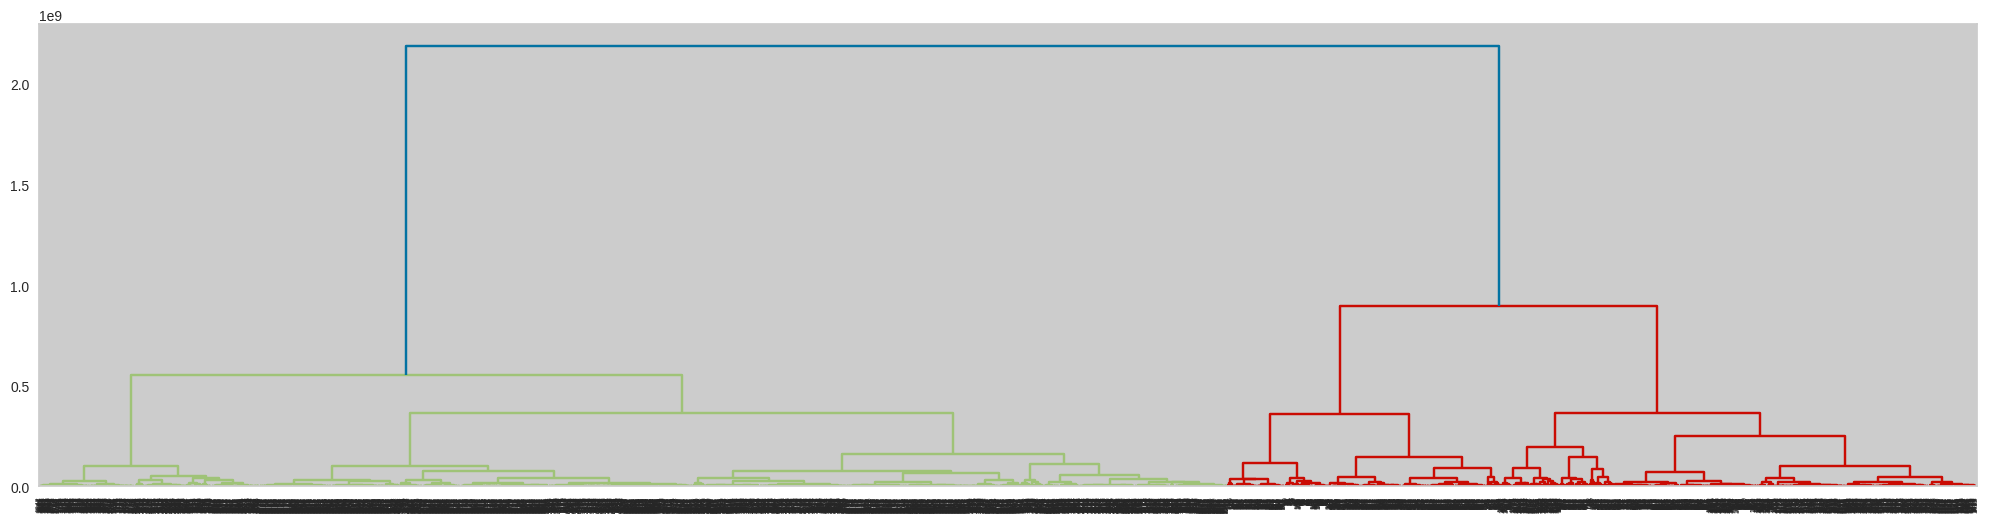

In [163]:
plt.figure(figsize=(25,6))
dendrogram(data);
#benzerlikleri göstermek çin kullanıyoruz

# **Recency, Frequency, Monetar**

## RFM NEDİR?  
RFM analizi, müşteri davranışlarını anlamak ve işletmenin pazarlama stratejilerini optimize etmek amacıyla kullanılan etkili bir araçtır. Bu üç metrik, müşterilerin değerini belirlemede ve hedefli pazarlama yapmada kritik rol oynar.

In [164]:
import datetime
now = pd.to_datetime('08.27.2024')
recency = now
df['Orders.placed_date'] = pd.to_datetime(df['Orders.placed_date'])
df['Recency'] = (now - df['Orders.placed_date']).dt.days
df['Frequency'] = df.groupby('Customers.id')['Orders.placed_date'].transform('count')
df['Monetary'] = df.groupby('Customers.id')['Orders.subtotal'].transform('sum')


In [165]:
df.groupby('Customers.id')['Orders.placed_date'].max()
#recency = recency.dt.days
#recency =df['Recency']
frequency = df.groupby('Customers.id')['Orders.placed_date'].count()
monetary = df.groupby('Customers.id')['Orders.subtotal'].sum()

In [166]:
# Create an RFM DataFrame
rfm_df = pd.DataFrame({
'Recency': recency,
'Frequency': frequency,
'Monetary': monetary
})

# Print the RFM DataFrame
print(rfm_df)

                Recency  Frequency  Monetary
Customers.id                                
3            2024-08-27          2     88.78
4            2024-08-27          1     19.56
5            2024-08-27          3     95.14
7            2024-08-27          1     39.19
8            2024-08-27          1     59.75
10           2024-08-27          1     34.00
11           2024-08-27          1     34.00
12           2024-08-27          1     21.52
13           2024-08-27          3    312.98
14           2024-08-27          1    339.99
15           2024-08-27          1     18.94
21           2024-08-27          1     34.00
22           2024-08-27          1     13.68
23           2024-08-27          4    323.54
24           2024-08-27          1     29.38
25           2024-08-27          1     35.00
26           2024-08-27          1     35.00
27           2024-08-27          7    125.16
30           2024-08-27          1     35.00
31           2024-08-27          1    170.34
32        

In [167]:
import plotly.express as px

# Scatter plot
fig = px.scatter(
    rfm_df,
    x='Recency',
    y='Frequency',
    size='Monetary',
    color='Monetary',
    title='RFM Scatter Plot',
    labels={'Recency': 'Recency', 'Frequency': 'Frequency'}
)
fig.show()

## 1. Recency (Yenilik)  
- **Tanım:** Müşterinin en son ne zaman alışveriş yaptığı.  
- **Önem:** Daha yakın zamanda alışveriş yapan müşteriler genellikle daha değerli kabul edilir, çünkü markaya daha bağlı olabilirler.  

## 2. Frequency (Sıklık)  
- **Tanım:** Belirli bir zaman diliminde müşterinin kaç kez alışveriş yaptığı.  
- **Önem:** Daha sık alışveriş yapan müşteriler, markayı tercih eden ve daha fazla gelir getiren müşterilerdir.  

## 3. Monetary (Mali)  
- **Tanım:** Müşterinin belirli bir zaman diliminde yaptığı toplam harcama.  
- **Önem:** Daha yüksek harcama yapan müşteriler, işletme için daha değerli kabul edilir.  

## Kullanım Alanları  
- **Müşteri Segmentasyonu:** Müşterileri farklı gruplara ayırarak hedefli pazarlama stratejileri geliştirmek.  
- **Sadakat Programları:** Değerli müşterilere özel teklifler sunarak sadakati artırmak.  
- **Pazarlama Kampanyaları:** Hedef kitleyi belirleyerek daha etkili kampanyalar oluşturmak.  

### SONUÇ:
Verideki ihtiyacımız olan sutunları alıp temizleme ve düzenleme işlemlerini tamamaldıktan sonra veriyi daha hızlı işleyebilmek için sql veritabanına yazdırdık sonrasında clustring algoritmalarıyla veriyi 4 sınıfa ayırdık ve RFM analizni yaparak projemizi tamamladık.